# Clasificacion con ANN - Nivel de Riesgo Academico

## Modelo 2: Clasificacion Multiclase

**Dataset**: Student Performance  
**Objetivo**: Clasificar estudiantes en 4 niveles de riesgo academico  
**Clases**: Sin riesgo, Riesgo bajo, Riesgo medio, Riesgo alto  


In [2]:
import sys
import os

# Pon la ruta exacta de la carpeta donde ESTÁ el archivo .py
#ruta = r"C:\PythonProject\Proyecto-AI\src\train"
ruta = r"C:\Users\monic\Documents\CUC\Inteligencia Artificial\Proyecto-AI\src\train"
if ruta not in sys.path:
    sys.path.append(ruta)

# Intentar importar
from src.train.model2 import modelos_clasificacion

print("✅ Importado correctamente")

✅ Importado correctamente


## 1. Librerias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras

# Modulo personalizado
from src.train.model2 import modelos_clasificacion

print("Librerias importadas")
print(f"TensorFlow: {tf.__version__}")

Librerias importadas
TensorFlow: 2.20.0


## 2. Carga de Datos

In [4]:
# Cargar datos escalados
X_train = pd.read_csv('../data/processed/X_train_scaled_m2.csv')
X_test = pd.read_csv('../data/processed/X_test_scaled_m2.csv')
y_train = pd.read_csv('../data/processed/y_train_m2.csv')
y_test = pd.read_csv('../data/processed/y_test_m2.csv')

print("Datos cargados")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Datos cargados
X_train: (835, 48)
X_test: (209, 48)
y_train: (835, 1)
y_test: (209, 1)



Distribucion de clases en entrenamiento:
risk_level
0             244
1             422
2             123
3              46
Name: count, dtype: int64


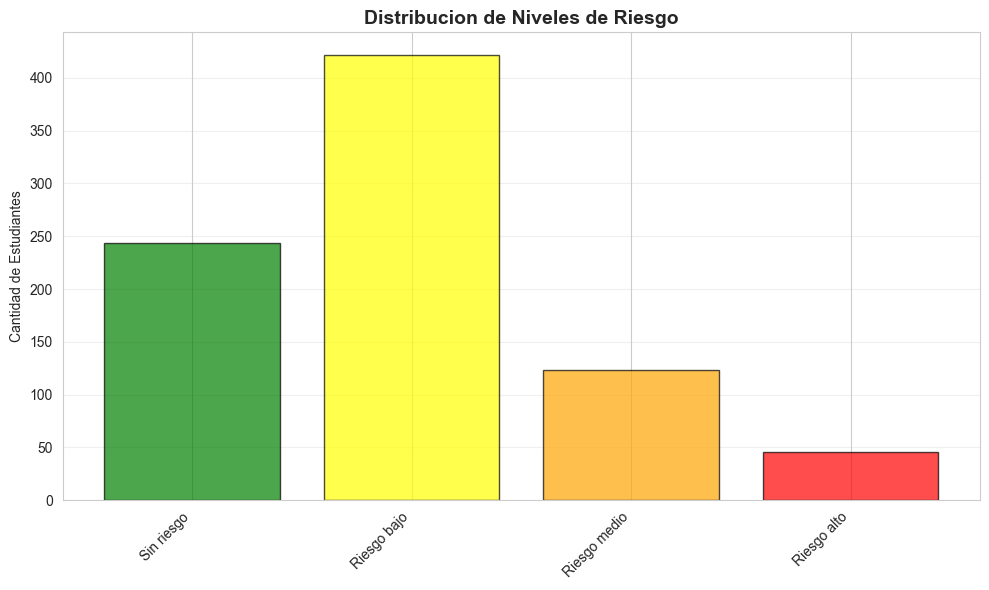

In [5]:
# Ver distribucion de clases
print("\nDistribucion de clases en entrenamiento:")
print(y_train.value_counts().sort_index())

# Grafico
plt.figure(figsize=(10, 6))
class_names = ['Sin riesgo', 'Riesgo bajo', 'Riesgo medio', 'Riesgo alto']
colors = ['green', 'yellow', 'orange', 'red']
counts = y_train.value_counts().sort_index()

plt.bar(class_names, counts.values, color=colors, alpha=0.7, edgecolor='black')
plt.title('Distribucion de Niveles de Riesgo', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 3. Creacion del Modelo

In [6]:
# Crear instancia de la clase
modelo_clasificacion = modelos_clasificacion()

In [7]:
# Crear modelo
modelo_creado = modelo_clasificacion.create_model_clasificacion(X_train)

# Ver arquitectura
print("\n" + "="*60)
print("ARQUITECTURA DEL MODELO")
print("="*60)
modelo_creado.summary()


ARQUITECTURA DEL MODELO


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4. Entrenamiento del Modelo

In [8]:
print("\n" + "="*60)
print("ENTRENAMIENTO DEL MODELO")
print("="*60)

# Entrenar
historial = modelo_clasificacion.entrenamiento_model_clasificacion(
    modelo_creado,
    X_train,
    y_train,
    X_test,
    y_test
)

print("\nEntrenamiento completado")


ENTRENAMIENTO DEL MODELO
Epoch 1/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - categorical_accuracy: 0.4539 - loss: 1.2788 - val_categorical_accuracy: 0.4737 - val_loss: 1.2463
Epoch 2/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.4958 - loss: 1.1693 - val_categorical_accuracy: 0.4880 - val_loss: 1.2445
Epoch 3/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.5150 - loss: 1.1252 - val_categorical_accuracy: 0.4833 - val_loss: 1.2147
Epoch 4/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.5305 - loss: 1.1035 - val_categorical_accuracy: 0.5263 - val_loss: 1.1754
Epoch 5/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.5569 - loss: 1.0605 - val_categorical_accuracy: 0.5407 - val_loss: 1.1279
Epoch 6/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.5701 - loss: 1.0191 - val_categorical_accuracy: 0.5455 - val_loss: 1.0862
Epoch 7/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_acc

## 5. Evaluacion del Modelo

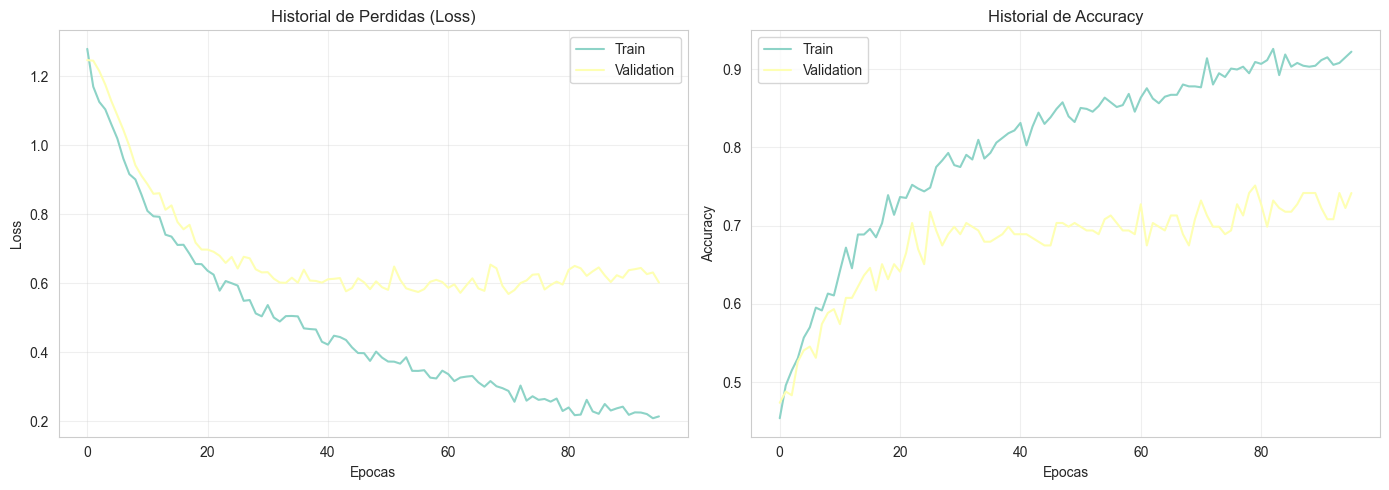

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

METRICAS DE EVALUACION
Accuracy: 0.7416 (74.16%)

REPORTE DE CLASIFICACION:

              precision    recall  f1-score   support

  Sin riesgo       0.84      0.72      0.77        50
 Riesgo bajo       0.75      0.85      0.79        98
Riesgo medio       0.65      0.59      0.62        44
 Riesgo alto       0.67      0.59      0.62        17

    accuracy                           0.74       209
   macro avg       0.73      0.69      0.70       209
weighted avg       0.74      0.74      0.74       209



In [9]:
# Evaluar modelo
predictions, predictions_classes, accuracy = modelo_clasificacion.evaluacion_modelo(
    historial,
    modelo_creado,
    X_test,
    y_test
)

## 6. Matriz de Confusion

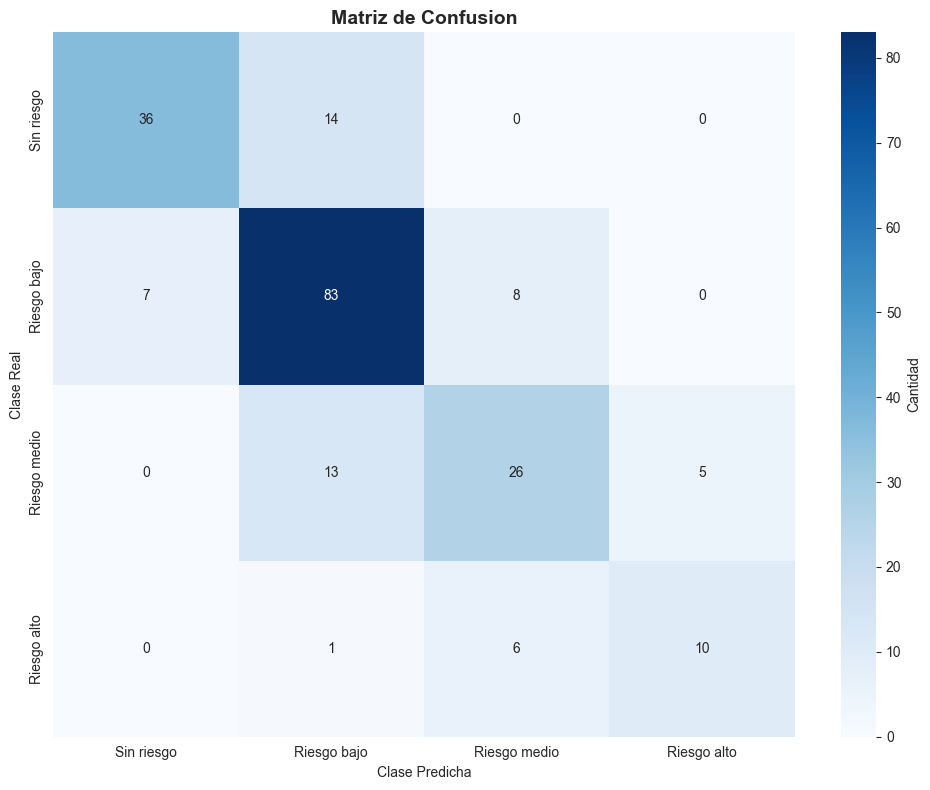

In [10]:
# Convertir y_test a array
y_test_values = y_test.values.flatten()

# Graficar matriz de confusion
cm = modelo_clasificacion.plot_confusion_matrix(y_test_values, predictions_classes)

## 7. Ejemplos de Predicciones

In [11]:
# Tomar 10 ejemplos
print("\nEjemplos de Predicciones:\n")
print(f"{'#':>3} | {'Real':^15} | {'Prediccion':^15} | {'Correcto':^8}")
print("-" * 60)

class_names = modelo_clasificacion.class_names

for i in range(10):
    real = y_test_values[i]
    pred = predictions_classes[i]
    real_name = class_names[real]
    pred_name = class_names[pred]
    correcto = "Si" if real == pred else "No"
    
    print(f"{i+1:3d} | {real_name:^15} | {pred_name:^15} | {correcto:^8}")


Ejemplos de Predicciones:

  # |      Real       |   Prediccion    | Correcto
------------------------------------------------------------
  1 |   Riesgo bajo   |   Riesgo bajo   |    Si   
  2 |   Riesgo bajo   |   Riesgo bajo   |    Si   
  3 |   Sin riesgo    |   Sin riesgo    |    Si   
  4 |   Riesgo bajo   |   Riesgo bajo   |    Si   
  5 |   Riesgo bajo   |   Riesgo bajo   |    Si   
  6 |  Riesgo medio   |  Riesgo medio   |    Si   
  7 |   Sin riesgo    |   Sin riesgo    |    Si   
  8 |  Riesgo medio   |   Riesgo alto   |    No   
  9 |   Riesgo alto   |  Riesgo medio   |    No   
 10 |  Riesgo medio   |   Riesgo bajo   |    No   


## 8. Guardar el Modelo

In [12]:
# Guardar modelo en formato Keras
modelo_creado.save('../models/modelo_clasificacion_riesgo.keras')
print("\nModelo guardado en: ../models/modelo_clasificacion_riesgo.keras")

# Tambien en H5
modelo_creado.save('../models/modelo_clasificacion_riesgo.h5')
print("Modelo guardado en: ../models/modelo_clasificacion_riesgo.h5")


Modelo guardado en: ../models/modelo_clasificacion_riesgo.keras
Modelo guardado en: ../models/modelo_clasificacion_riesgo.h5


In [13]:
# Guardar metricas
metricas_df = pd.DataFrame({
    'Modelo': ['Modelo 2 - Clasificacion'],
    'Accuracy': [accuracy],
    'Num_Clases': [4]
})

metricas_df.to_csv('../models/modelo_clasificacion_riesgo_metrics.csv', index=False)
print("\nMetricas guardadas en: ../models/modelo_clasificacion_riesgo_metrics.csv")


Metricas guardadas en: ../models/modelo_clasificacion_riesgo_metrics.csv


## 9. Verificar Carga del Modelo

In [14]:
# Cargar modelo guardado
modelo_cargado = keras.models.load_model('../models/modelo_clasificacion_riesgo.keras')

# Hacer prediccion de prueba
muestra_test = X_test.iloc[:1]
prediccion_test = modelo_cargado.predict(muestra_test, verbose=0)
clase_test = np.argmax(prediccion_test, axis=1)[0]

print(f"\nPrediccion de prueba:")
print(f"   Clase predicha: {clase_test} ({class_names[clase_test]})")
print(f"   Clase real: {y_test.iloc[0].values[0]} ({class_names[int(y_test.iloc[0].values[0])]})")
print(f"\nEl modelo se cargo correctamente")


Prediccion de prueba:
   Clase predicha: 1 (Riesgo bajo)
   Clase real: 1 (Riesgo bajo)

El modelo se cargo correctamente


## 10. Resumen

In [15]:
print("\n" + "="*60)
print("RESUMEN - MODELO 2 (CLASIFICACION)")
print("="*60)

print("\nOBJETIVO:")
print("   Clasificar estudiantes en 4 niveles de riesgo academico")

print("\nARQUITECTURA:")
print("   - Tipo: ANN Clasificacion Multiclase")
print("   - Activacion final: Softmax")
print("   - Loss: Categorical Crossentropy")
print("   - Optimizer: Adam")

print("\nRENDIMIENTO:")
print(f"   - Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   - Clases: {len(class_names)}")

print("\nARCHIVOS GENERADOS:")
print("   - modelo_clasificacion_riesgo.keras")
print("   - modelo_clasificacion_riesgo.h5")
print("   - modelo_clasificacion_riesgo_metrics.csv")

print("\n" + "="*60)
print("MODELO 2 COMPLETADO")
print("="*60)


RESUMEN - MODELO 2 (CLASIFICACION)

OBJETIVO:
   Clasificar estudiantes en 4 niveles de riesgo academico

ARQUITECTURA:
   - Tipo: ANN Clasificacion Multiclase
   - Activacion final: Softmax
   - Loss: Categorical Crossentropy
   - Optimizer: Adam

RENDIMIENTO:
   - Accuracy: 0.7416 (74.16%)
   - Clases: 4

ARCHIVOS GENERADOS:
   - modelo_clasificacion_riesgo.keras
   - modelo_clasificacion_riesgo.h5
   - modelo_clasificacion_riesgo_metrics.csv

MODELO 2 COMPLETADO
